In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tools.misc_tools import create_Lorenz_data

In [5]:
T = 100
t0 = 0.0
delta_t = 0.01
rho_arr = np.array([28])
sigma_arr = np.array([10])
beta_arr = np.array([8/3])
x0 = 1.0
y0 = 1.0
z0 = 1.0

In [6]:
res_dict = create_Lorenz_data(
    T, t0, delta_t,
    rho_arr, sigma_arr, beta_arr,
    x0, y0, z0)

In [34]:
lorenz_attractor_pos = np.array([
    [
        [(beta_arr[0]*(rho_arr[0]-1))**0.5, (beta_arr[0]*(rho_arr[0]-1))**0.5, rho_arr[0]-1],
        [-(beta_arr[0]*(rho_arr[0]-1))**0.5, -(beta_arr[0]*(rho_arr[0]-1))**0.5, rho_arr[0]-1]
    ]
])

In [8]:
all_data = res_dict['all_data']

In [26]:
new_data = all_data[int(25//delta_t):, 0:3]

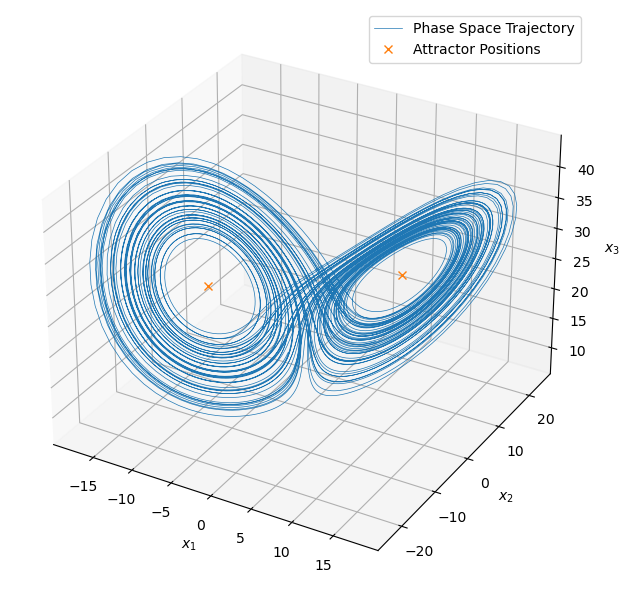

In [44]:
num_cols = 1
num_rows = 1

fig = plt.figure(figsize=(7.5*num_cols, 7.5*num_rows))

ax_orig = fig.add_subplot(projection ='3d')
ax_orig.plot(new_data[:, 0], new_data[:, 1], new_data[:, 2], linewidth=0.5)
ax_orig.plot(
    lorenz_attractor_pos[0, :, 0],
    lorenz_attractor_pos[0, :, 1],
    lorenz_attractor_pos[0, :, 2],
    marker='x',
#     color='C1'
    linewidth=0.0
)
# ax_orig.title.set_text(r'Actual Data - [$\sigma$, $\rho$, $\beta$] = ' + np.array2string(all_data[next_idx-1, 3:], precision=2, separator=', '))
ax_orig.set_xlabel(r'$x_1$')
ax_orig.set_ylabel(r'$x_2$')
ax_orig.set_zlabel(r'$x_3$')
ax_orig.xaxis.set_rotate_label(False)
ax_orig.yaxis.set_rotate_label(False)
ax_orig.zaxis.set_rotate_label(False)

ax_orig.legend([r'Phase Space Trajectory', r'Attractor Positions'])
# ax_orig.title.set_text(r'Phase Space Trajectory')

plt.savefig('lorenz_phase_space.png', dpi=300, bbox_inches='tight')

In [55]:
new_data = all_data[int(80//delta_t):, 0:3]

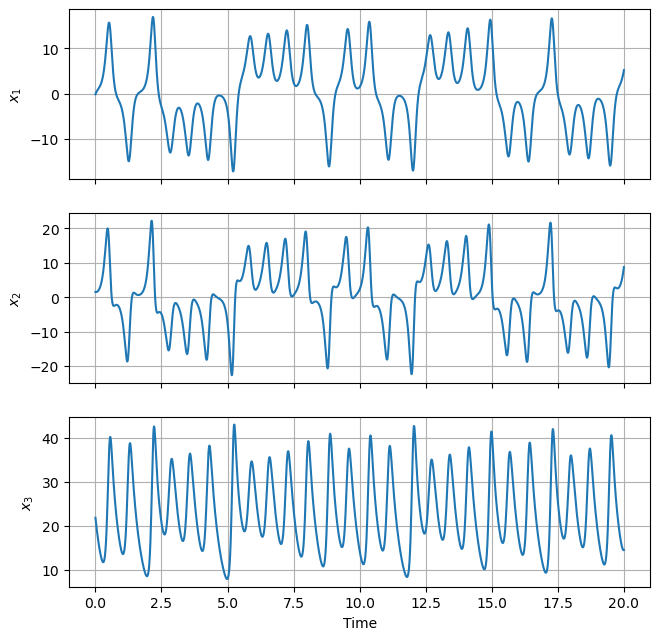

In [63]:
num_cols = 1
num_rows = 3

fig = plt.figure(figsize=(7.5*num_cols, 2.5*num_rows))

input_time = np.arange(0, new_data.shape[0])*delta_t

subplot_idx = 1
for j in range(3):
    ax_orig = fig.add_subplot(num_rows, num_cols, subplot_idx)
    
#     ax_orig.plot(input_time, np.ones_like(input_time)*lorenz_attractor_pos[0, 0, j], color='C1', linewidth=0.8)
#     ax_orig.plot(input_time, np.ones_like(input_time)*lorenz_attractor_pos[0, 1, j], color='C1', linewidth=0.8)
    
#     ax_orig.axhline(lorenz_attractor_pos[0, 0, j], color='C1', linewidth=0.8)
#     ax_orig.axhline(lorenz_attractor_pos[0, 1, j], color='C1', linewidth=0.8)
    
    ax_orig.plot(input_time, new_data[:, j])#, label='Actual Data')
    ax_orig.set_ylabel(r'$x_'+str(j+1)+'$')
    ax_orig.grid(True)
    ax_orig.set_axisbelow(True)
#     if j == 0:
        # if save_figs == False or True:
#         ax_orig.title.set_text(r'$x_1^*$={:.2f},  $x_4^*$={:.2f},  $C$={:.2f}, $\beta$={:.2f}, $\gamma$={:.2f}, $b$={:.2f}'.format(
#             all_data[i*(N+1), 6],
#             all_data[i*(N+1), 7],
#             all_data[i*(N+1), 8],
#             all_data[i*(N+1), 9],
#             all_data[i*(N+1), 10],
#             all_data[i*(N+1), 11]
#         ))
#         ax_orig.legend(loc='upper left', bbox_to_anchor=[1, 1])
    subplot_idx += 1
    if j < 3-1:
        ax_orig.xaxis.set_ticklabels([])

ax_orig.set_xlabel('Time')
plt.savefig('lorenz_time_evolution.png', dpi=300, bbox_inches='tight')